In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


start_date = dt.date(2017, 4, 13)
end_date = dt.date(2017, 4, 20)

In [12]:
sample_query_dates = session.query(Measurement.date).limit(5).all()
for result in sample_query_dates:
    print(result)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)


In [13]:
latest_date = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).limit(5).all()
latest_date


[('2017-08-23')]

In [14]:
precipitation_data = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()
precipitation_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
precipitation_data_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])
precipitation_data_df.set_index('date', inplace=True)
precipitation_data_df

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


precipitation_data_sorted_df = precipitation_data_df.sort_values(by = 'date')

#plot the dataframe
precipitation_data_sorted_df.plot(x_compat = True, title='Precipitaiton from 2016-8-23 to 2017-8-23 ')
plt.tight_layout()
plt.xticks(rotation = 20)
plt.ylabel('Precipitation')

Text(20.685000000000002, 0.5, 'Precipitation')

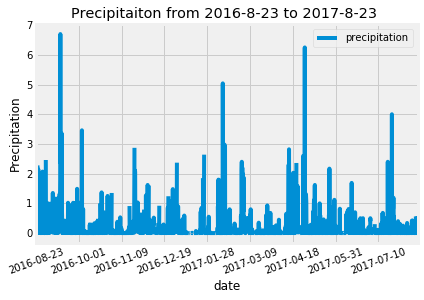

In [16]:
precipitation_data_sorted_df = precipitation_data_df.sort_values(by = 'date')

precipitation_data_sorted_df.plot(x_compat = True, title='Precipitaiton from 2016-8-23 to 2017-8-23 ')
plt.tight_layout()
plt.xticks(rotation = 20)
plt.ylabel('Precipitation')

In [17]:
precipitation_data_sorted_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
stations_query = session.query(Station.id).distinct().count()
stations_query

9

In [19]:
stations_query = session.query(Station.station, func.count(Measurement.id)).select_from(Measurement).\
join(Station, Measurement.station == Station.station).group_by(Station.station).order_by(func.count(Measurement.id).desc()).all()

for stations in stations_query:
    
    print (f"Station: {stations[0]} Count: {stations[1]}")

Station: USC00519281 Count: 2772
Station: USC00519397 Count: 2724
Station: USC00513117 Count: 2709
Station: USC00519523 Count: 2669
Station: USC00516128 Count: 2612
Station: USC00514830 Count: 2202
Station: USC00511918 Count: 1979
Station: USC00517948 Count: 1372
Station: USC00518838 Count: 511


## Optional Challenge Assignment

In [20]:
most_active_station = 'USC00519281'
temperature = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f"Max Temperature: {temperature[0][0]}")
print(f"Min Temperature: {temperature[0][1]}")
print(f"Avg Temperature: {round(temperature[0][2],2)}")

Max Temperature: 85.0
Min Temperature: 54.0
Avg Temperature: 71.66


In [21]:
highest_temperature_station = 'USC00519281'
temperature_highest_station = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == highest_temperature_station).\
filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016,8,23)).all()

query_df = pd.DataFrame(temperature_highest_station, columns = ['date', 'temperature'])
query_df.set_index('date', inplace = True)
query_df

,temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


Text(0.5, 0, 'Temperature')

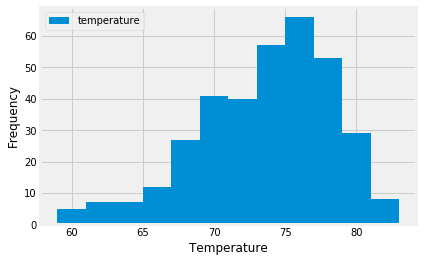

In [22]:
query_df.plot.hist(bins=12)
plt.xlabel("Temperature")

In [27]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
chosen_trip_temperatures = calc_temps(start_date, end_date)
chosen_trip_temperatures


print(f" Max Temp: {chosen_trip_temperatures[0][2]}")
print(f" Min Temp: {chosen_trip_temperatures[0][0]}")
print(f" Avg Temp: {round(chosen_trip_temperatures[0][1],2)}")

NameError: name 'start_date' is not defined